# Acc, Precision, Recall 리뷰
---

ROC 곡선과 AUC를 다루기 전에 오차 행렬에 대해서 다시 한 번 다루겠습니다.

오차 행렬은 어려운 개념은 아니지만 상당히 헷갈리는 개념으로 계속해서 보는게 좋다고 생각합니다.

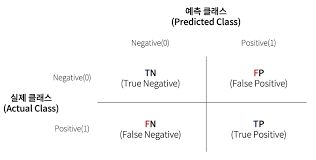

위와 같은 오차 행렬에서 실제 클래스 Positive에 해당하는 부분이 Negative(정상환자), Positive(암환자)라고 가정합시다.

그리고 예측 클래스는 Negative(정상판정), Positive(암판정)입니다.

위 오차 행렬은 TN, TP, FP, FN 등으로 구분 되는데 T, P의 의미가 무엇인지 부터 다시 따져봅시다.


`여기서 True, False의 의미는 내 Prediction이 맞았냐 안맞았냐를 의미합니다.`

**즉, True Positive는 실제 암환자를 암환자로 양성 판정 한것이고 False Positive는 정상 환자를 암환자로 양성 판정한 것입니다. 판단이 틀린 것이죠?**

반대로 True Negative는 실제 정상 환자를 음성으로 판정한것이고 False Negative는 암환자를 정상으로 판정한 것입니다.

**그럼 이제 Accuracy, Precision, Recall 에 대한 이해가 쉬워집니다.**

Accuracy는 말그대로 정화도로 TP + TN / ALL 입니다.

즉, Accuracy는 전체 오차 행렬 중에서 실제 예측이 맞은 것들의 비율입니다.

Precision은 내가 내린 양성 판단(Positive Prediction) 중에 얼마나 맞았냐를 의미합니다.

식으로는 `TP / TP + FP` 가 됩니다.


마지막으로 Recall은 전체 양성 데이터 중에서 얼마나 많이 검출했는가를 따지는 지표입니다.

즉, 전체 암환자 중에서 얼마나 놓치지 않고 검출했냐를 의미하고 모든 환자를 암환자로 예측해버리면 Recall은 100%의 값을 가집니다.

식으로는 `TP / TP + FN` 으로 표현 가능합니다.

# ROC curve & AUC
---

`ROC curve`는 Receiver Operation Characteristic Curve의 줄임말로 수신자 판단 곡선이라고도 불립니다.

어떤 이진 분류 판정에 있어 판정선이 얼마나 민감하느냐에 대한 것이 ROC 곡선입니다.

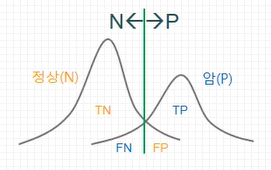

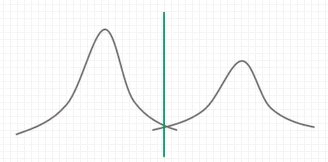

두번째 그림의 경우 판정선이 약간 움직이더라도 정상 환자와 암환자를 구분하는데 큰 오차가 없을 것입니다. 이런 경우 더 좋은 ROC 곡선이 그려집니다.



정리하면 ROC curve는 머신러닝의 이진 분류 모델의 예측 성능을 판단하는 지표입니다.

**ROC curve는 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선입니다.**

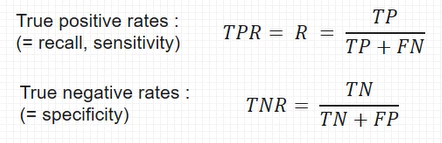

위의 암환자 판정 예시를 통해 다시 설명하자면 Recall(TPR)은 내가 전체 암환자 중에 얼마나 많이 검출했느냐를 따지는 지표입니다.

따라서 TPR을 높이기 위해선 판정선을 암환자 분포의 가장 왼쪽으로 이동시키면 됩니다.

하지만 이 경우 TPR은 높아지지만 TNR은 낮아집니다.

이처럼 TPR과 TNP은 트레이드 오프 관계에 있어 그래프로 표현하면 곡선의 형태가 그려지는 것입니다.

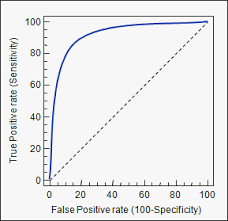

위 이미지는 ROC 곡선의 예입니다.

가운데 점선은 ROC 곡선의 최저 값으로 아무리 나쁜 모델도 이진 분류 모델에서는 50%의 정확도를 가지기 때문에 위처럼 표현됩니다.

즉 ROC 곡선이 가운데 점선에 가까울수록 성능이 낮은 것이고 점선에서 멀어질수록 성능이 좋은 것입니다.

# Titanic ROC curve
---

앞서 설명한 ROC curve를 이용해서 타이타닉 데이터의 생존자 이진분류 모델의 성능을 측정해보겠습니다.

### 로지스틱 회귀 이진분류 모델 생성

In [79]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

#로지스틱 회귀를 이용한 분류 모델 생성

# 데이터 전처리
titanic = sns.load_dataset('titanic')
titanic = titanic.dropna()

titanic.drop(['class','who','deck','embark_town','alive'], axis=1, inplace=True)

titanic['pclass'] = pd.get_dummies(titanic['pclass'])
titanic['sex'] = titanic['sex'].astype('category').cat.codes
titanic['embarked'] = titanic['embarked'].astype('category').cat.codes
titanic['alone'] = titanic['alone'].astype('category').cat.codes
titanic['adult_male'] = titanic['adult_male'].astype('category').cat.codes
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1

label = titanic.survived
titanic_df = titanic.drop('survived',axis=1)

# 학습 데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(titanic_df, label, test_size=0.2)

# 로지스틱 회귀 알고리즘을 이용한 생존자 이진 분류 모델
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [80]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때 예측 확률 추출
pred_proba_class_1 = lr_clf.predict_proba(X_test)[:,1]
pred_proba_class_1

array([0.93425291, 0.27244755, 0.96002851, 0.32946929, 0.25585936,
       0.83888864, 0.95838347, 0.27522422, 0.48425398, 0.93108216,
       0.34981439, 0.49016096, 0.24857765, 0.39094894, 0.9708915 ,
       0.54138456, 0.18730093, 0.92681049, 0.9442817 , 0.96110628,
       0.95077128, 0.39579162, 0.86206324, 0.80087066, 0.88710887,
       0.91702193, 0.85123733, 0.21038282, 0.53345523, 0.91289251,
       0.58015267, 0.39546432, 0.44540043, 0.92959474, 0.95956641,
       0.30113127, 0.83749661])

In [81]:
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class_1)

# 반환된 임곗값 배열에서 샘플로 데이터 추출
# thresholds[0]은 max(예측확률)+1 값이 임의로 지정됨.

thr_index = np.arange(1, thresholds.shape[0])

pd.DataFrame({'index':thr_index,
             'FPR':fprs[thr_index],
             'TPR':tprs[thr_index]})

,index,FPR,TPR
0,1,0.000000,0.043478
1,2,0.000000,0.173913
2,3,0.142857,0.173913
3,4,0.142857,0.739130
4,5,0.357143,0.739130
5,6,0.357143,0.826087
6,7,0.571429,0.826087
7,8,0.571429,0.869565
8,9,0.642857,0.869565
9,10,0.642857,0.913043


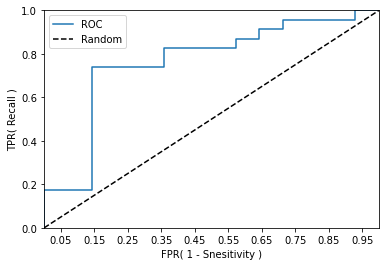

In [82]:
import matplotlib.pyplot as plt

def roc_curve_plot(y_test, pred_proba_c1):
    # 임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 시각화
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선
    plt.plot([0,1],[0,1], 'k--',label='Random')
    
    # FPR X 축의 scla 0.1 단위 지정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR( 1 - Snesitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba_class_1)

위의 ROC 곡선 자체는 FPR과 TPR의 변화 값을 보기 위해 이요합니다.

여기서 성능 지표로 사용되는 것은 ROC 곡선 면적을 기반한 AUC(Area Under Curve) 값입니다.

AUC 값은 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐를 묻습니다.

이 값은 1에 가까울 수록 좋으며 왼쪽 상단 모서리 방향으로 가파르게 이동할수록 직사각형에 가까운 형태의 곡선이 그려지면서 좋은 성능을 냅니다.

In [83]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC Score: ', roc_score)

ROC AUC Score:  0.7639751552795031


# 이진 분류 모델 측정 지표 종합
---

마지막으로 타이타닉 로지스틱 회귀 이진 분류 모델의 accuracy, precision, recall, f1, ROC AUC를 모두 구하는 함수를 작성하겠습니다.

In [91]:
from sklearn.metrics import *


def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    # ROC AUC
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('Confusion Matrix')
    print(confusion)
    
    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, f1: {3:.4f}, roc_auc: {4:.4f}'.format(
         accuracy, precision, recall, f1, roc_auc))

In [92]:
get_clf_eval(y_test, pred=pred, pred_proba=pred_proba)

Confusion Matrix
[[ 9  5]
 [ 6 17]]
accuracy: 0.7027, precision: 0.7727, recall: 0.7391, f1: 0.7556, roc_auc: 0.7640
